# STEP1: Load your Dataset

In [175]:
import pandas as pd

# Load your dataset
df = pd.read_csv(r"C:\Users\achan\Documents\Machine Learning\HousingData.csv") #path_to_your_dataset.csv

# Display the first few rows(5) of the DataFrame
print(df.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


# CRIM: Per capita crime rate by town.
# ZN: Proportion of residential land zoned for lots over 25,000 sq. ft.
# INDUS: Proportion of non-retail business acres per town.
# CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise).
# NOX: Nitric oxides concentration (parts per 10 million).
# RM: Average number of rooms per dwelling.
# AGE: Proportion of owner-occupied units built before 1940.
# DIS: Weighted distances to five Boston employment centers.
# RAD: Index of accessibility to radial highways.
# TAX: Full-value property tax rate per $10,000.
# PTRATIO: Pupil-teacher ratio by town.
# LSTAT: Percentage lower status of the population.
# MEDV: Median value of owner-occupied homes in $1000s. 

# STEP2: Exploratory Data Analysis 

In [165]:
# Check for missing values
print(df.isnull().sum())

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [166]:
# Summary statistics
print(df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.720192   23.388876    6.835896    0.255340    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081900    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.253715    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.560263   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  486.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.518519    3.795043    9.549407  408.237154   18.455534  356.674032   
std     27.999513    2.1057

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

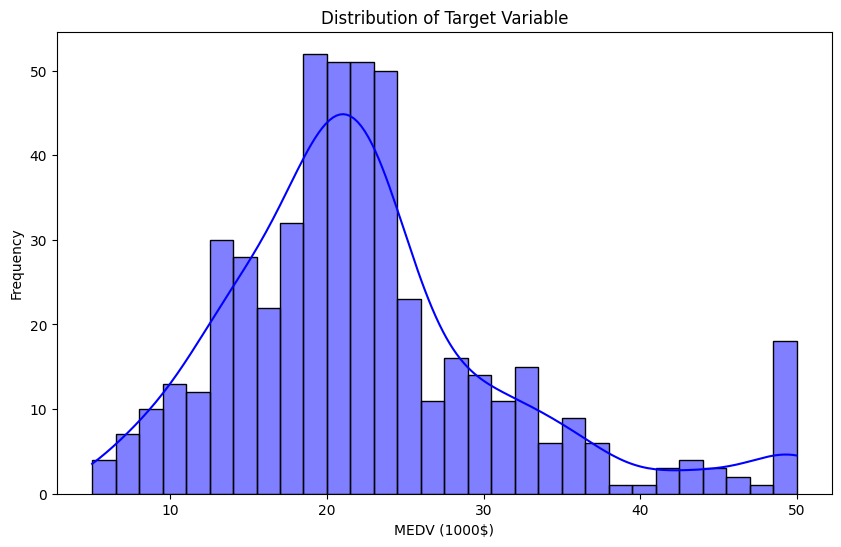

In [169]:
# Histogram of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['MEDV'], bins=30, kde=True, color='blue')
plt.title('Distribution of Target Variable')
plt.xlabel('MEDV (1000$)')
plt.ylabel('Frequency')
plt.show()

# Visualize key features

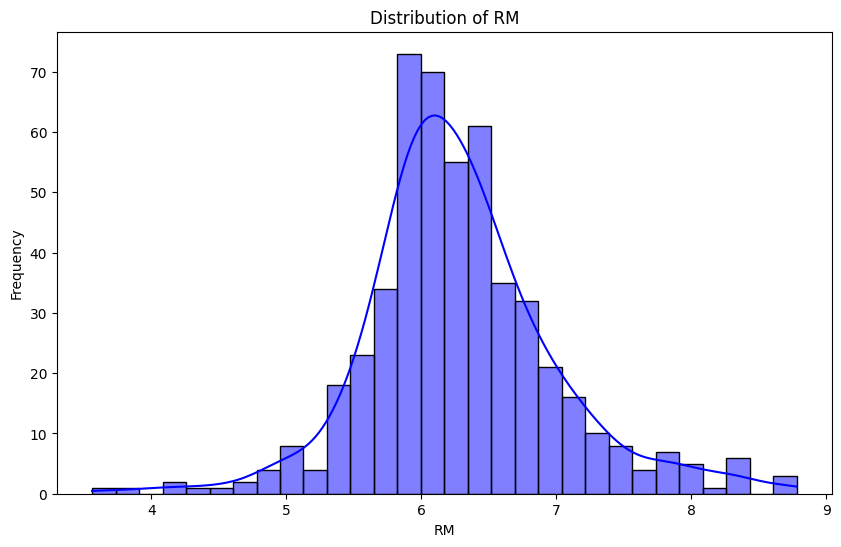

In [170]:
# Histogram for RM
plt.figure(figsize=(10, 6))
sns.histplot(df['RM'], bins=30, kde=True, color='blue')
plt.title('Distribution of RM')
plt.xlabel('RM')
plt.ylabel('Frequency')
plt.show()

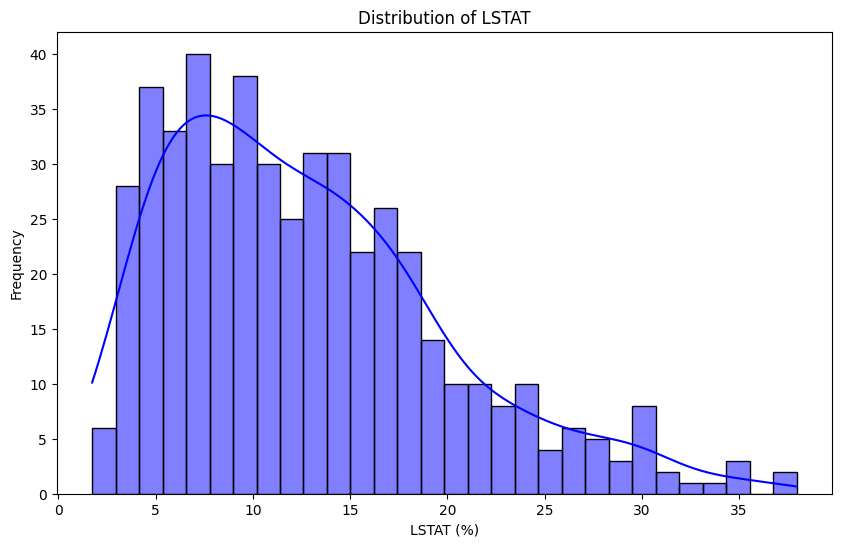

In [171]:
# Histogram for LSTAT
plt.figure(figsize=(10, 6))
sns.histplot(df['LSTAT'], bins=30, kde=True, color='blue')
plt.title('Distribution of LSTAT')
plt.xlabel('LSTAT (%)')
plt.ylabel('Frequency')
plt.show()

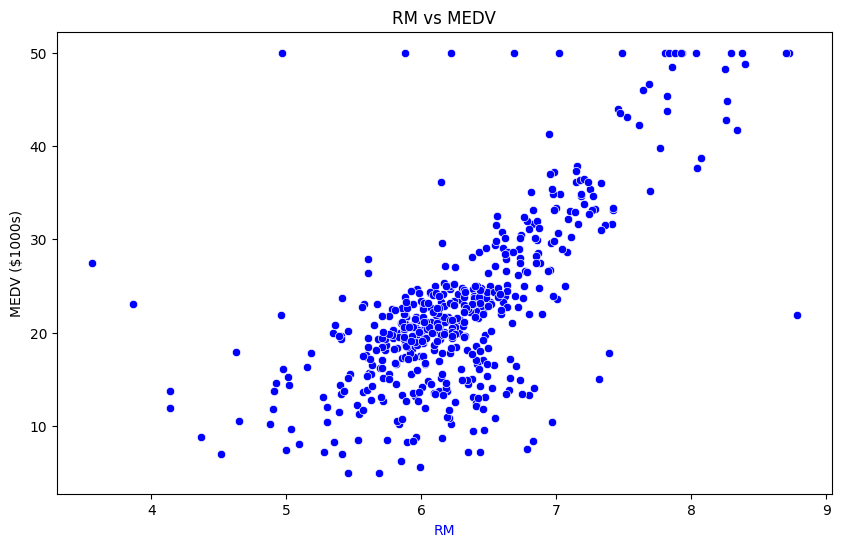

In [172]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RM', y='MEDV', data=df, color='blue')  # Set data points color to blue
plt.title('RM vs MEDV')
plt.xlabel('RM')  
plt.ylabel('MEDV ($1000s)')  
plt.show()

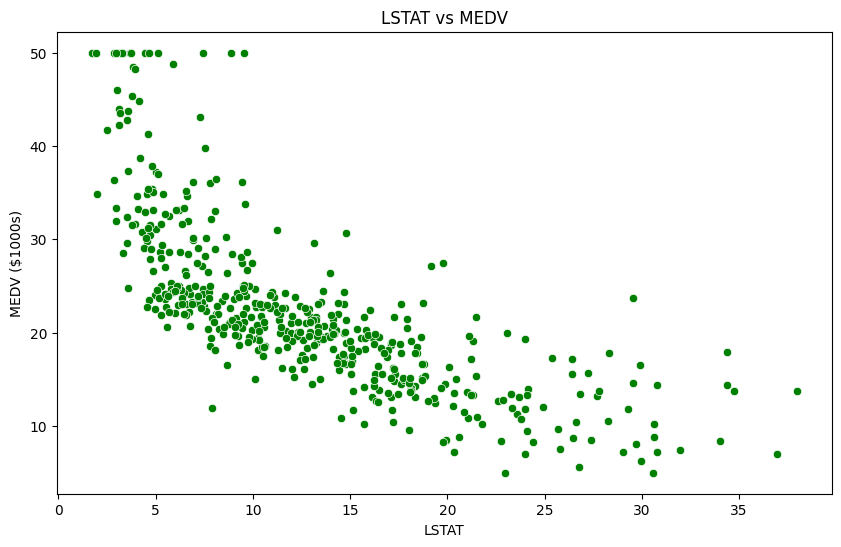

In [173]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LSTAT', y='MEDV', data=df, color='green')  
plt.title('LSTAT vs MEDV')
plt.xlabel('LSTAT')
plt.ylabel('MEDV ($1000s)')
plt.show()

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Define your features and target
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [174]:
# Check for NaN values in X_train_scaled
print(pd.DataFrame(X_train_scaled).isnull().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64


In [ ]:

from sklearn.impute import SimpleImputer

# Create an imputer object with a strategy (e.g., mean)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data
imputer.fit(X_train_scaled)

# Transform both the training and testing data
X_train_scaled = imputer.transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)

In [ ]:
print(pd.DataFrame(X_train_scaled).isnull().sum())

# Regression Analysis

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [ ]:
# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2


In [ ]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_mse, lr_r2 = evaluate_model(lr, X_test_scaled, y_test)


In [ ]:
# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
ridge_mse, ridge_r2 = evaluate_model(ridge, X_test_scaled, y_test)

In [ ]:
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
lasso_mse, lasso_r2 = evaluate_model(lasso, X_test_scaled, y_test)

In [ ]:
# Ordinary Least Square Regression
X_train_ols = sm.add_constant(X_train_scaled)
X_test_ols = sm.add_constant(X_test_scaled)
ols = sm.OLS(y_train, X_train_ols).fit()
y_pred_ols = ols.predict(X_test_ols)
ols_mse = mean_squared_error(y_test, y_pred_ols)
ols_r2 = r2_score(y_test, y_pred_ols)

In [ ]:
# Report Results
print(f"Linear Regression: MSE = {lr_mse:.2f}, R^2 = {lr_r2:.2f}")
print(f"Ridge Regression: MSE = {ridge_mse:.2f}, R^2 = {ridge_r2:.2f}")
print(f"Lasso Regression: MSE = {lasso_mse:.2f}, R^2 = {lasso_r2:.2f}")
print(f"OLS Regression: MSE = {ols_mse:.2f}, R^2 = {ols_r2:.2f}")